# Test: Data analyses 2

**Author:** Maxime ABITBOL 21305862     
**Teacher:** Franck LIN - ADD2

## 1. Exercise 1 (60%)

### Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

### Settings

In [3]:
!pwd
!ls ../data/

/home/maxime/Documents/Study/M1/ADD2/Exam/Data-Analyses-ADD2/src
Faces_Test_Inputs.csv  Faces_Train_Inputs.csv
Faces_Test_Labels.csv  Faces_Train_Labels.csv


In [4]:
PATH_DATA = "../data/"
PATH_TRAIN_X = PATH_DATA + "Faces_Train_Inputs.csv"
PATH_TRAIN_Y = PATH_DATA + "Faces_Train_Labels.csv"
PATH_TEST_X = PATH_DATA + "Faces_Test_Inputs.csv"
PATH_TEST_Y = PATH_DATA + "Faces_Test_Labels.csv"

### Load Data

In [5]:
df_train_x = pd.read_csv(PATH_TRAIN_X, sep=",", header=None)
df_train_y = pd.read_csv(PATH_TRAIN_Y, sep=",", header=None)
df_test_x = pd.read_csv(PATH_TEST_X, sep=",", header=None)
df_test_y = pd.read_csv(PATH_TEST_Y, sep=",", header=None)

### 1.1 Describe data & Face mean

Train y: 320 images, 40 people, 8 image of same people, dataset corresponding to the label

In [6]:
df_train_y.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,1,1,1,1,1,1,1,1,2,2,...,39,39,40,40,40,40,40,40,40,40


Test y: 80 images, 40 people, 2 image of same people

In [28]:
df_test_y.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1,1,2,2,3,3,4,4,5,5,...,36,36,37,37,38,38,39,39,40,40


Train x: 10305 pixels per images

In [29]:
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.18824,0.17647,0.17647,0.19216,0.18039,0.18431,0.17647,0.18431,0.18824,0.207840,...,0.18431,0.17255,0.18431,0.20392,0.18824,0.192160,0.176470,0.180390,0.18431,0.180390
1,0.23529,0.22745,0.26667,0.30980,0.19216,0.16863,0.20392,0.20392,0.21961,0.282350,...,0.14510,0.15686,0.14118,0.12549,0.12941,0.145100,0.141180,0.129410,0.12157,0.133330
2,0.15294,0.17255,0.23137,0.21176,0.24314,0.27059,0.29020,0.23922,0.17255,0.184310,...,0.15294,0.14510,0.13333,0.12157,0.12549,0.133330,0.109800,0.109800,0.10588,0.113730
3,0.24706,0.21961,0.20392,0.15686,0.16863,0.16863,0.11373,0.11765,0.11765,0.094118,...,0.16078,0.16078,0.13725,0.12549,0.10588,0.094118,0.090196,0.098039,0.10980,0.094118
4,0.25098,0.23529,0.24706,0.20784,0.23529,0.16078,0.11765,0.10980,0.14902,0.215690,...,0.15686,0.17255,0.15686,0.16863,0.16471,0.160780,0.160780,0.137250,0.16471,0.152940


In [19]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Columns: 10304 entries, 0.18824 to 0.18039.123
dtypes: float64(10304)
memory usage: 25.1 MB


Test x: 10305 pixels per images

In [33]:
df_test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.164706,0.160784,0.211765,0.188235,0.168627,0.156863,0.180392,0.176471,0.160784,0.160784,...,0.168627,0.156863,0.160784,0.164706,0.180392,0.164706,0.168627,0.156863,0.152941,0.160784
1,0.133333,0.137255,0.133333,0.133333,0.149020,0.141176,0.117647,0.105882,0.094118,0.105882,...,0.184314,0.172549,0.184314,0.168627,0.164706,0.149020,0.164706,0.160784,0.152941,0.129412
2,0.168627,0.149020,0.152941,0.145098,0.156863,0.160784,0.164706,0.168627,0.176471,0.152941,...,0.125490,0.125490,0.117647,0.109804,0.105882,0.098039,0.105882,0.109804,0.121569,0.552941
3,0.145098,0.121569,0.133333,0.149020,0.160784,0.156863,0.149020,0.164706,0.156863,0.152941,...,0.117647,0.121569,0.105882,0.098039,0.101961,0.090196,0.101961,0.105882,0.262745,0.521569
4,0.407843,0.407843,0.415686,0.419608,0.419608,0.423529,0.396078,0.419608,0.415686,0.407843,...,0.215686,0.227451,0.207843,0.215686,0.239216,0.243137,0.250980,0.247059,0.235294,0.219608


In [35]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 6.3 MB


Face mean (from train set)

/home/maxime/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


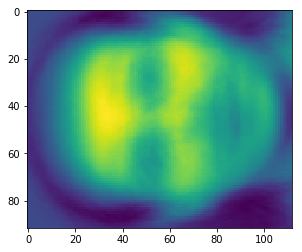

In [14]:
face_mean = np.mean(df_train_x)

#matr_face_mean = face_mean.as_matrix()
matr_face_mean = np.reshape(face_mean.as_matrix(), (92,112))
plt.imshow(matr_face_mean)



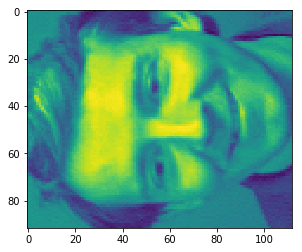

In [29]:



hello = pd.read_csv("../data/Faces_Train_Inputs.csv", header=None)
donne1 = hello[16:17] #donnees 17 
donne1

matr = donne1.values
image = np.reshape(matr, (92,112))

imgplot = plt.imshow(image)

### 1.2 PCA Reduction

In [32]:
def my_PCA(k, X=df_train_x):
    pca = PCA(n_components=k)
    X_reduced = pca.fit_transform(X)
    return X_reduced

Reduction with k=5

In [34]:
X_reduced5 = my_PCA(k=5)
X_reduced5.shape

(320, 5)

Reduction with k=10

In [35]:
X_reduced10 = my_PCA(k=10)
X_reduced10.shape

(320, 10)

Reduction with k=50

In [36]:
X_reduced50 = my_PCA(k=50)
X_reduced50.shape

(320, 50)

### 1.3

Choisissez un visage et représentez le graphiquement pour k=5,10,50.

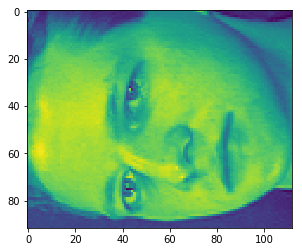

In [30]:
# test pour le visage n°5
donne1 = hello[4:5]
matr = donne1.values
image = np.reshape(matr, (92,112))
imgplot = plt.imshow(image)

In [44]:
imaa = X_reduced5[4:5]
X_reduced5

#ama = imaa.values
#image5 = np.reshape(ama, (92,112))
#plt.imshow(image5)

array([[ 5.42465860e+00, -5.18854691e+00, -7.55573424e+00,
        -1.39882507e-01, -1.86453084e+00],
       [ 1.14517961e+01, -4.47303417e+00,  6.49804025e-01,
        -4.76326188e+00, -9.69505195e+00],
       [ 1.02426910e+01, -3.05839156e+00, -4.42357864e+00,
         7.35385553e-01, -3.07833972e+00],
       ...,
       [ 1.90342531e+00, -4.49256168e+00,  6.24689128e+00,
         1.10844399e+00, -2.54067570e-03],
       [ 3.75614345e+00, -5.63746766e+00,  4.17266110e+00,
         2.00327468e+00, -1.35690984e+00],
       [ 2.64896873e+00, -4.29011585e+00,  6.26958041e+00,
         1.73548054e-01,  2.03864498e+00]])

### 1.4

### 1.5

### 1.6

### 1.7

## 2. Exercise 2 (40%)